In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
test.shape
train.shape


(31962, 3)

In [4]:
import re

In [6]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [7]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [9]:
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    return df
test_clean = clean_text(test, "tweet")
train_clean = clean_text(train, "tweet")

In [10]:
test_clean

,id,tweet
0,31963,studiolife aislife requires passion dedication...
1,31964,white supremacists want everyone to see the ...
2,31965,safe ways to heal your acne altwaystoheal h...
3,31966,is the hp and the cursed child book up for res...
4,31967,3rd bihday to my amazing hilarious nephew el...
...,...,...
17192,49155,thought factory leftright polarisation trump u...
17193,49156,feeling like a mermaid hairflip neverready fo...
17194,49157,hillary campaigned today in ohioomg amp used w...
17195,49158,happy at work conference right mindset leads t...


<function matplotlib.pyplot.show(close=None, block=None)>

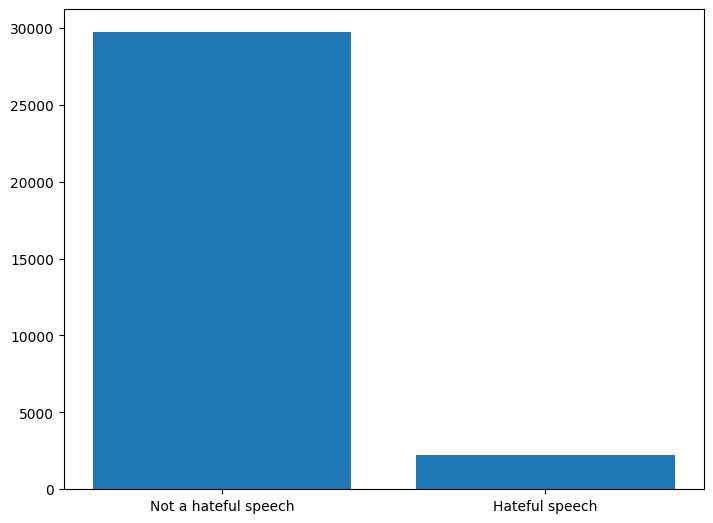

In [13]:
fig= plt.figure()
ax = fig.add_axes([0,0,1,1])
langs=['Not a hateful speech',"Hateful speech"]
data = [ len(train_clean[train_clean.label==0]),len(train_clean[train_clean.label==1])]
ax.bar(langs,data)
plt.show

In [23]:
from sklearn.utils import resample
train_majority= train_clean[train_clean.label==0]
train_minority = train_clean[train_clean.label==1]
train_minority_upsampled = resample(train_minority,replace=True,n_samples=len(train_majority),random_state=123)
train_upsampled = pd.concat([train_minority_upsampled,train_majority])
train_upsampled['label'].value_counts()

1    29720
0    29720
Name: label, dtype: int64

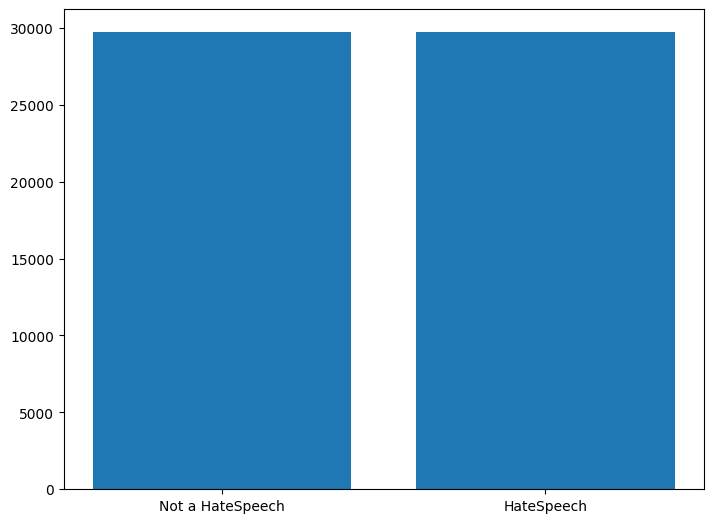

In [24]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Not a HateSpeech','HateSpeech']
data = [len(train_upsampled[train_upsampled.label==0]),len(train_upsampled[train_upsampled.label==1])]
ax.bar(langs,data)
plt.show()

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Create and fit vectorizer separately
vectorizer = TfidfVectorizer()
vectorizer.fit(xtrain)

# Create pipeline with fitted vectorizer
pipeline_sgd = Pipeline([
    ('tfidf', vectorizer),
    ('clf', SGDClassifier())  # Assuming SGDClassifier is your classifier
])


In [35]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(train_upsampled['tweet'],train_upsampled['label'],random_state=0)

In [36]:
model = pipeline_sgd.fit(xtrain, ytrain)

# Predict and evaluate
y_predict = model.predict(xtest)
from sklearn.metrics import f1_score
f1_score(ytest, y_predict)

0.969729297239632